In [49]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 주성분분석 라이브러리
from sklearn.decomposition import PCA

# 군집분석 라이브러리
from sklearn.cluster import KMeans

# 표준화 라이브러리
from sklearn.preprocessing import StandardScaler

# 그래프 한글 깨짐 방지
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 오류 무시
import warnings
warnings.filterwarnings('ignore')

In [9]:
df[df['시군구'] =='성북구']

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
112,성북구,22913019,1,10,0,4,25,0.0,0.0,0.0


In [20]:
# 데이터 불러오기
df = pd.read_csv('final_animal_visit_travel.csv', encoding = 'cp949')

# 성북구와 인천광역시 동구 제외
df2 = df[(df['시군구'] != '성북구')&(df['시군구'] != '인천광역시 동구')]

# 시군구 제외
df3 = df2.drop(columns = '시군구')

In [23]:
# 표준화
sc = StandardScaler()
df_scaled = sc.fit_transform(df3)
pd.DataFrame(df_scaled, columns = df3.columns)

,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12
0,0.227897,1.726743,0.553670,6.612802,3.756224,1.224118,-0.078488,-0.508321,0.081620
1,5.175575,-0.407751,0.553670,-0.375440,0.556018,1.168241,-0.513044,0.392763,0.038229
2,0.325440,-0.407751,-0.191781,-0.438969,-0.468048,0.162461,-3.617013,-0.658502,-0.048551
3,0.481085,0.756519,0.553670,1.752798,3.500208,1.000611,0.542306,0.392763,-0.959750
4,-0.002250,-0.601796,-0.340872,-0.438969,0.043985,0.218338,1.970132,-0.258020,-0.352284
...,...,...,...,...,...,...,...,...,...
222,-0.200668,0.174384,-0.340872,1.721033,0.043985,-0.396306,0.480226,0.492884,0.472133
223,2.033302,1.726743,2.640934,0.291620,0.428010,2.844542,0.045671,-0.157899,0.038229
224,-0.633747,-0.019661,-0.489962,-0.343675,-0.468048,-0.396306,1.411417,0.542944,-0.005161
225,-0.970993,-0.213706,-0.788142,-0.121322,-0.724064,-0.843319,-1.133838,0.893366,0.602305


In [35]:
class myPCA:
    def __init__(self, explained_var_ratio_thres=0.7):
        self.explained_var_ratio_thres = explained_var_ratio_thres
        self.n_components = None ## 최종 선택된 주성분 개수
        self.explained_var = None ## 주성분별 분산 설명 비율
        self.components = None ## 성분(축)
        self.principal_components = None ## 주성분
        self.total_variance = None ## 총 데이터 분산
        self.pc_variable_corr_mat = None ## 주성분과 변수간 상관 행렬
        
    def fit(self, X):
        c = self.explained_var_ratio_thres
        X = X - np.mean(X, axis=0)
        n = X.shape[0]
        variance_X = (1/(n-1))*X.T @ X
        eigen_value, eigen_vector = np.linalg.eig(variance_X)
        total_variance = np.sum(eigen_value)
 
        eigen_value, eigen_vector = np.linalg.eig(variance_X)
        total_variance = np.sum(eigen_value) ## 데이터 총 분산
        explained_var = eigen_value/total_variance ## 주성분별 분산 설명 비율
        
        ## 누적 분산 설명 비율이 c를 넘는 최초 인덱스
        last_idx = np.min(np.where(np.cumsum(explained_var) > c)[0]) 
        
        self.n_components = last_idx+1
        self.pc_var = eigen_value[:last_idx+1]
        self.explained_var = self.pc_var/total_variance
        self.components = eigen_vector[:, :last_idx+1]
        self.principal_components = X@eigen_vector[:, :last_idx+1]
        self.total_variance = total_variance
        
        pc_variable_corr_mat = np.zeros((last_idx+1, X.shape[1]))
        for i in range(last_idx+1):
            for j in range(X.shape[1]):
                pc = self.principal_components[:, i]
                variable = X[:, j]
                pc_variable_corr_mat[i, j] = np.corrcoef(pc, variable)[0,1]
        self.pc_variable_corr_mat = pc_variable_corr_mat
        return self

In [41]:
pca = myPCA(0.7).fit(df_scaled)
pca.n_components

3

In [40]:
pca.explained_var

array([0.41061557, 0.19986614, 0.16364267, 0.0948138 ])

In [42]:
pca.components

array([[ 0.36773809,  0.04999602, -0.43057931],
       [ 0.3855118 , -0.11163983,  0.41484406],
       [ 0.45404389, -0.04135139, -0.00504242],
       [ 0.30886535, -0.08584854,  0.50614395],
       [ 0.46309422, -0.06121313, -0.05927511],
       [ 0.43675344,  0.01706149, -0.34941743],
       [ 0.02833809,  0.02016414,  0.49684149],
       [ 0.05528983,  0.70086437,  0.0371458 ],
       [ 0.07433607,  0.69303783,  0.11163056]])

In [43]:
pca.pc_variable_corr_mat

array([[ 0.70693189,  0.74109971,  0.87284434,  0.5937562 ,  0.8902425 ,
         0.83960554,  0.05447654,  0.106288  ,  0.14290209],
       [ 0.06705425, -0.14973042, -0.05546014, -0.11513936, -0.08209854,
         0.02288273,  0.02704398,  0.93999351,  0.92949661],
       [-0.52254379,  0.50344776, -0.0061194 ,  0.61424777, -0.07193527,
        -0.4240471 ,  0.60295845,  0.04507952,  0.13547296]])

In [44]:
# 주성분분석 실시
pca = PCA(random_state = 42)
x_p = pca.fit_transform(df_scaled)

In [46]:
x_pp = pd.DataFrame(x_p[:, :3], columns = ['PC1', 'PC2', 'PC3'], index = df2.index)

In [47]:
x_pp

,PC1,PC2,PC3
0,5.293204,1.282300,3.263294
1,2.659235,-0.590935,-3.267673
2,-0.548487,0.429273,-2.386481
3,3.285015,0.809896,0.610854
4,-0.392074,0.265372,0.381890
...,...,...,...
224,0.293469,-0.509727,1.477033
225,4.138552,0.286276,-1.023093
226,-0.889451,-0.447577,0.980306
227,-1.476377,-1.068938,0.146675


In [59]:
x_pp['시군구'] = df2.시군구

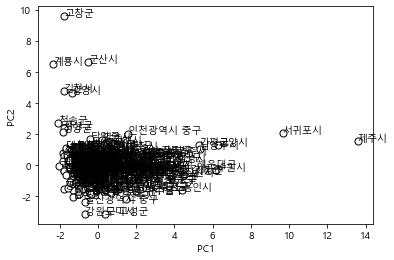

In [63]:
plt.scatter(
    x_pp['PC1'],
    x_pp['PC2'],
    c= 'white',
    marker = 'o',
    edgecolor = 'black',
    s= 50)
plt.xlabel('PC1')
plt.ylabel('PC2')

for i in range(len(x_pp)):
    row = x_pp.iloc[i]
    name = row['시군구']
    x = row['PC1']
    y = row['PC2']
    
    plt.text(x, y, name)
    
plt.show()

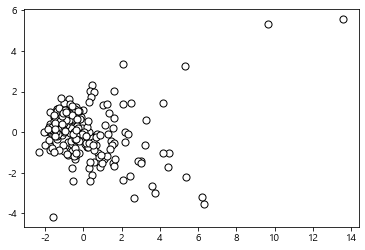

In [51]:
plt.scatter(
    x_pp['PC1'],
    x_pp['PC3'],
    c= 'white',
    marker = 'o',
    edgecolor = 'black',
    s= 50)
plt.xlabel('PC1')
plt.ylabel('PC3')

Text(0, 0.5, 'PC3')

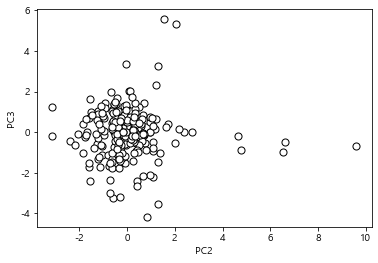

In [64]:
plt.scatter(x_pp['PC2'],
            x_pp['PC3'],
            c= 'white',
            marker = 'o',
            edgecolor = 'black',
            s= 50)
plt.xlabel('PC2')
plt.ylabel('PC3')

In [67]:
x_pp[['시군구', 'PC1', 'PC2', 'PC3']].to_csv('df_pca.csv', encoding ='cp949')